In [27]:
import pandas as pd 
from pandas import DataFrame, Series
import sqlite3


In [71]:
result = pd.read_csv("result.csv")
train = pd.read_csv("train.csv")
conn = sqlite3.connect('result.db')
result.to_sql("result", conn, if_exists="replace", index=False)
train.to_sql("train", conn,if_exists="replace", index=False )

In [30]:
def query(QUERRY):  #Will be using ths for generating queries
    return pd.read_sql(QUERRY, conn)

In [138]:

result3 = query("""
select `Education` from result
group by `Education`
""")
result4 = query("""
select Education, count(predict) as `count` from result
where predict = 0
group by Education
""")
result5 = query("""
select Education, count(predict) as `count` from result
where predict = 1
group by Education
""")
query("select * from train")

,Unnamed: 0,I.am.currently.employed.at.least.part.time,I.identify.as.having.a.mental.illness,Education,I.have.my.own.computer.separate.from.a.smart.phone,I.have.been.hospitalized.before.for.my.mental.illness,How.many.days.were.you.hospitalized.for.your.mental.illness,I.am.legally.disabled,I.have.my.regular.access.to.the.internet,I.live.with.my.parents,...,Obsessive.thinking,Mood.swings,Panic.attacks,Compulsive.behavior,Tiredness,Age,Gender,Household.Income,Region,Device.Type
0,1,0,0,High School or GED,0,0,0,0,1,0,...,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,2,1,1,Some Phd,1,0,0,0,1,0,...,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,3,1,0,Completed Undergraduate,1,0,0,0,1,0,...,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,4,1,0,High School or GED,1,0,0,0,1,1,...,0,0,0,0,0,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet
4,5,1,0,Some Undergraduate,1,0,0,0,1,0,...,0,0,0,0,0,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,238,1,0,Completed Undergraduate,1,0,0,0,1,0,...,0,0,0,0,0,45-60,Female,"$75,000-$99,999",East North Central,Android Phone / Tablet
238,239,0,1,Completed Undergraduate,0,0,0,0,1,0,...,0,0,0,0,0,18-29,Female,"$50,000-$74,999",Mountain,iOS Phone / Tablet
239,240,1,0,Some Undergraduate,1,0,0,0,1,1,...,0,0,0,0,0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
240,241,1,0,Some Undergraduate,1,0,0,0,1,0,...,0,0,0,0,0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop


Text(0.5, 0, 'Count')

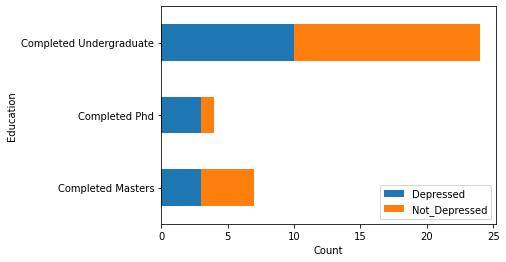

In [112]:
education = DataFrame({'Education':result3['Education'],'Depressed': result5['count'],'Not_Depressed': result4['count']})
education = education[0:3]
education = education.set_index("Education")
graph = education.plot.barh(stacked = True)
graph.set_xlabel("Count")

<AxesSubplot:ylabel='Education'>

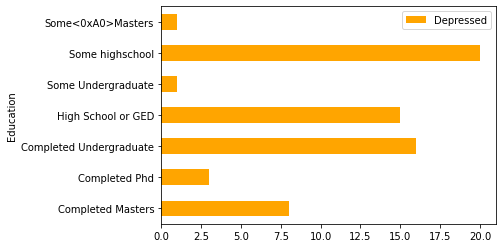

In [99]:
result6 =  query("""
select Education, count(Depression) as `count` from train
where Depression = 0
group by Education
""")
result7 =  query("""
select Education, count(Depression) as `count` from train
where Depression = 1
group by Education
""")
education2 = DataFrame({'Education':result3['Education'], 'Depressed': result7['count']})
education2 = education2.set_index(education2['Education'])
education2 = education2[0:7]
education2.plot.barh(color = "orange")


<AxesSubplot:ylabel='Age'>

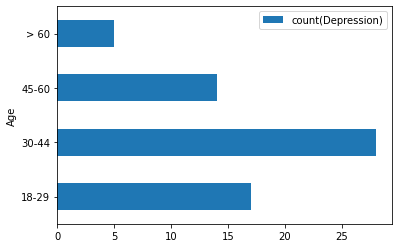

In [121]:
result7 = query("""
select `Age`, count(Depression) from train
where Depression = 1
group by `Age`
""")
result7 = result7.set_index(result7['Age'])
result7.plot.barh()

Text(0.5, 0, 'Count')

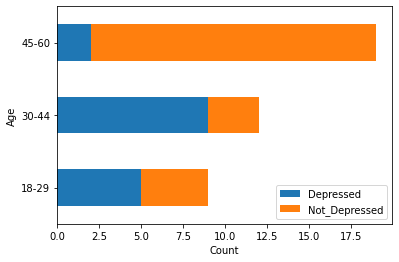

In [124]:
result3 = query("""
select `Age` from result
group by `Age`
""")
result4 = query("""
select Age, count(predict) as `count` from result
where predict = 0
group by Age
""")
result5 = query("""
select Age, count(predict) as `count` from result
where predict = 1
group by Age
""")
education = DataFrame({'Age':result3['Age'],'Depressed': result5['count'],'Not_Depressed': result4['count']})
education = education[0:3]
education = education.set_index("Age")
graph = education.plot.barh(stacked = True)
graph.set_xlabel("Count")

<AxesSubplot:ylabel='Region'>

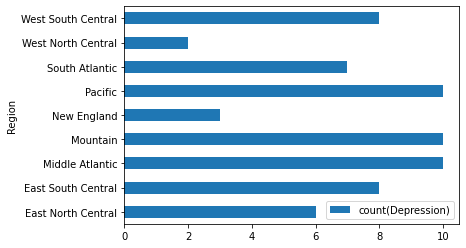

In [131]:
result7 = query("""
select `Region`, count(Depression) from train
where Depression = 1
group by `Region`
""")
result7 = result7.set_index(result7['Region'])
result7.plot.barh()

Text(0.5, 0, 'Count')

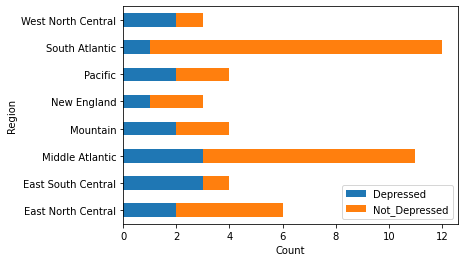

In [134]:
result3 = query("""
select `Region` from result
group by `Region`
""")
result4 = query("""
select Region, count(predict) as `count` from result
where predict = 0
group by Region
""")
result5 = query("""
select Region, count(predict) as `count` from result
where predict = 1
group by Region
""")
education = DataFrame({'Region':result3['Region'],'Depressed': result5['count'],'Not_Depressed': result4['count']})
education = education[0:8]
education = education.set_index("Region")
graph = education.plot.barh(stacked = True)
graph.set_xlabel("Count")

<AxesSubplot:ylabel='Household.Income'>

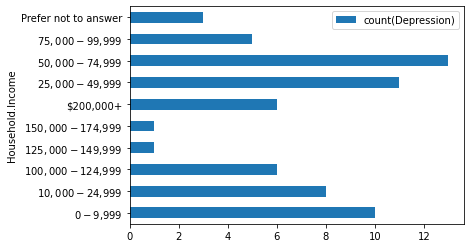

In [142]:
result7 = query("""
select `Household.Income`, count(Depression) from train
where Depression = 1
group by `Household.Income`
""")
result7 = result7.set_index(result7['Household.Income'])
result7.plot.barh()

Text(0.5, 0, 'Count')

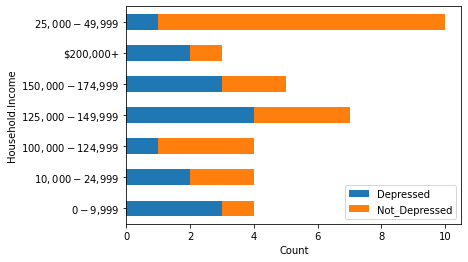

In [141]:
result3 = query("""
select `Household.Income` from result
group by `Household.Income`
""")
result4 = query("""
select `Household.Income`, count(predict) as `count` from result
where predict = 0
group by `Household.Income`
""")
result5 = query("""
select `Household.Income`, count(predict) as `count` from result
where predict = 1
group by `Household.Income`
""")
education = DataFrame({'Household.Income':result3['Household.Income'],'Depressed': result5['count'],'Not_Depressed': result4['count']})

education = education[0:7]
education = education.set_index("Household.Income")
graph = education.plot.barh(stacked = True)
graph.set_xlabel("Count")

<AxesSubplot:ylabel='Gender'>

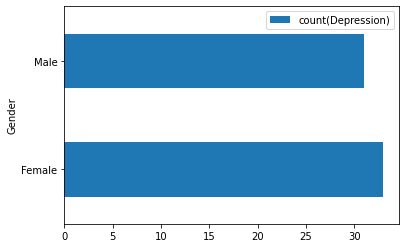

In [144]:
result7 = query("""
select `Gender`, count(Depression) from train
where Depression = 1
group by `Gender`
""")
result7 = result7.set_index(result7['Gender'])
result7.plot.barh()

Text(0.5, 0, 'Count')

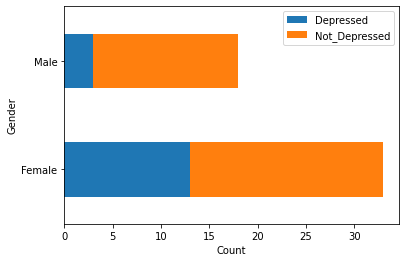

In [145]:
result3 = query("""
select `Gender` from result
group by `Gender`
""")
result4 = query("""
select `Gender`, count(predict) as `count` from result
where predict = 0
group by `Gender`
""")
result5 = query("""
select `Gender`, count(predict) as `count` from result
where predict = 1
group by `Gender`
""")
education = DataFrame({'Gender':result3['Gender'],'Depressed': result5['count'],'Not_Depressed': result4['count']})

education = education[0:7]
education = education.set_index("Gender")
graph = education.plot.barh(stacked = True)
graph.set_xlabel("Count")